In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyspectrum import Spectrometer
from colorimeter import Colorimeter


In [2]:
device = Spectrometer()
device.set_config(
    exposure=100, n_times=1,
    wavelength_calibration_path='data/profile.json' 
)

device.read_dark_signal(n_times=100)


Wavelength calibration loaded


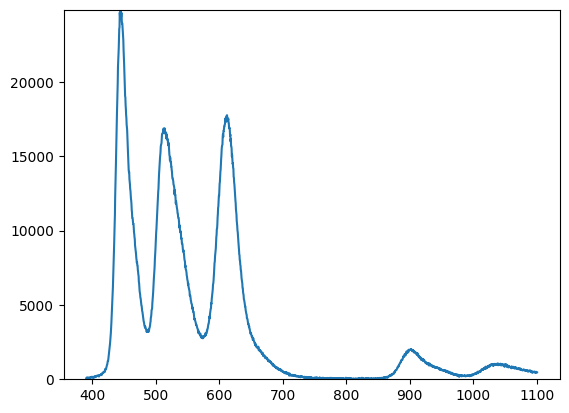

In [3]:
white_spectrum = device.read()
plt.plot(white_spectrum.wavelength, white_spectrum.intensity[0])
plt.ylim(0, max(white_spectrum.intensity[0]))
plt.show()


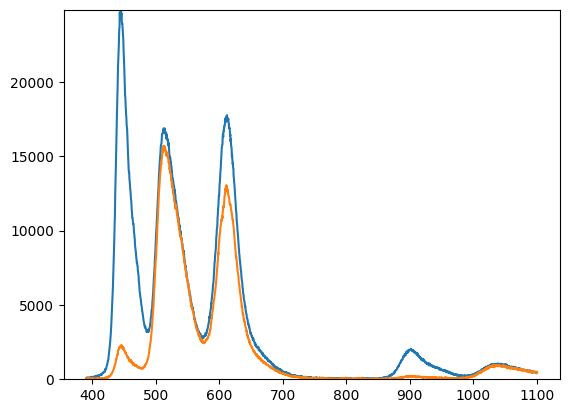

In [4]:
spectrum = device.read()
plt.plot(white_spectrum.wavelength, white_spectrum.intensity[0])
plt.plot(spectrum.wavelength, spectrum.intensity[0])
plt.ylim(0, max(white_spectrum.intensity[0]))
plt.show()


Using illuminant "D65" and observer "2deg"

XYZ:                      	0.641471279999794	0.8456131162571222	0.18786830802951965
xyY:                      	0.38297874224041084	0.5048579067892969	0.8456131162571222

Lab:                      	93.69375232825051	-34.23719522274593	77.78456920377207
LCh(ab):                  	93.69375232825051	84.98602675108904	113.75689012871004
Luv:                      	93.69375232825051	-15.957696626965069	96.96132766769031
LCh(uv):                  	93.69375232825051	98.26569668363146	99.34584276782375

sRGB (No adaptation):     	0.8462309920237574	0.9877820981736988	0.27571691411664173
sRGB (XYZ Scaling):       	0.8462309920237574	0.9877820981736988	0.27571691411664173
sRGB (Bradford):          	0.8462309920237575	0.9877820981736988	0.27571691411664173
sRGB (Von Kries):         	0.8462309920237576	0.9877820981736988	0.2757169141166418

Adobe RGB (No adaptation):	0.8864066472407407	0.9873729107696092	0.3499638937114796
Adobe RGB (XYZ Scaling):  	0.8864

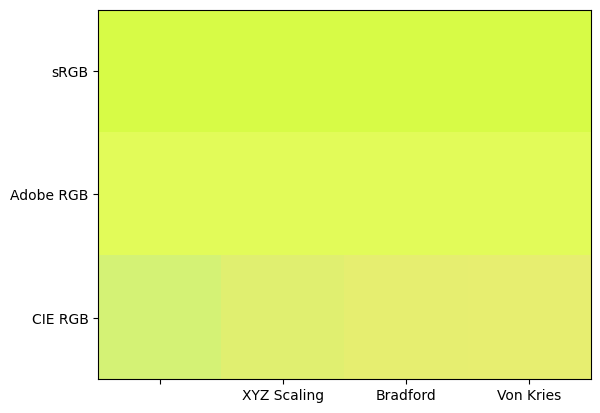

In [5]:
colorimeter = Colorimeter(white_spectrum, illuminant='D65', observer='2deg')
colorimeter.measure(spectrum)
print(f'Using illuminant "{colorimeter.illuminant}" and observer "{colorimeter.observer}"')
print()
print('XYZ:                      ', *colorimeter.XYZ(), sep='\t')
print('xyY:                      ', *colorimeter.xyY(), sep='\t')
print()
print('Lab:                      ', *colorimeter.Lab(), sep='\t')
print('LCh(ab):                  ', *colorimeter.LCh_ab(), sep='\t')
print('Luv:                      ', *colorimeter.Luv(), sep='\t')
print('LCh(uv):                  ', *colorimeter.LCh_uv(), sep='\t')
print()
print('sRGB (No adaptation):     ', *colorimeter.RGB('sRGB', None), sep='\t')
print('sRGB (XYZ Scaling):       ', *colorimeter.RGB('sRGB', 'XYZ Scaling'), sep='\t')
print('sRGB (Bradford):          ', *colorimeter.RGB('sRGB', 'Bradford'), sep='\t')
print('sRGB (Von Kries):         ', *colorimeter.RGB('sRGB', 'Von Kries'), sep='\t')
print()
print('Adobe RGB (No adaptation):', *colorimeter.RGB('Adobe RGB', None), sep='\t')
print('Adobe RGB (XYZ Scaling):  ', *colorimeter.RGB('Adobe RGB', 'XYZ Scaling'), sep='\t')
print('Adobe RGB (Bradford):     ', *colorimeter.RGB('Adobe RGB', 'Bradford'), sep='\t')
print('Adobe RGB (Von Kries):    ', *colorimeter.RGB('Adobe RGB', 'Von Kries'), sep='\t')
print()
print('CIE RGB (No adaptation):  ', *colorimeter.RGB('CIE RGB', None), sep='\t')
print('CIE RGB (XYZ Scaling):    ', *colorimeter.RGB('CIE RGB', 'XYZ Scaling'), sep='\t')
print('CIE RGB (Bradford):       ', *colorimeter.RGB('CIE RGB', 'Bradford'), sep='\t')
print('CIE RGB (Von Kries):      ', *colorimeter.RGB('CIE RGB', 'Von Kries'), sep='\t')

rgb_spaces = ['sRGB', 'Adobe RGB', 'CIE RGB']
adaptation_methods = [None, 'XYZ Scaling', 'Bradford', 'Von Kries']
plt.imshow([[colorimeter.RGB(rgb, adapt) for adapt in adaptation_methods] for rgb in rgb_spaces])
plt.xticks(np.arange(4), adaptation_methods)
plt.yticks(np.arange(3), rgb_spaces)
plt.show()
